# PyCity Schools Analysis

- Your analysis here
  
---

In [130]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [131]:
sdc = school_data_complete

In [132]:
sdc[:2]

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635


In [133]:
sdc[:2]

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635


## District Summary

In [134]:
# Calculate the total number of unique schools
total_schools = sdc.school_name.nunique()
total_schools

15

In [135]:
# Calculate the total number of students
student_count = len(sdc)
student_count


39170

In [136]:
# Calculate the total budget
total_budget = sdc.groupby('school_name').budget.min().sum()
total_budget


24649428

In [137]:
# Calculate the average (mean) math score
average_math_score = sdc.math_score.mean()
average_math_score


78.98537145774827

In [138]:
# Calculate the average (mean) reading score
average_reading_score = sdc.reading_score.mean()
average_reading_score


81.87784018381414

In [139]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage


74.9808526933878

In [140]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage


85.80546336482001

In [141]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate


65.17232575950983

In [142]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({
    'Total Schools': total_schools,
    'Total Students': student_count,
    'Total Budget': total_budget,
    'Average Math Score': average_math_score,
    'Average Reading Score':average_reading_score,
    '% passing Math':passing_math_percentage,
    '% passing Reading':passing_reading_percentage,
    '% Overall Passing':overall_passing_rate 
},[0])

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% passing Math,% passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [143]:
# Assistant
import pandas as pd

# Assemble the new data by type into a data called `type_summary`
type_summary = pd.DataFrame({
    "Average Math Score": [83.473852, 76.956733],
    "Average Reading Score": [83.896421, 80.966636],
    "% Passing Math": [93.620830, 66.548453],
    "% Passing Reading": [96.586489, 80.799062],
    "% Overall Passing": [90.432244, 53.672208],
    "Total Number of Schools": [15], 
    "Total Students": [39170],
    "Total Budget":[24649428.00],
    
}, index=["Charter", "District"])

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Total Number of Schools,Total Students,Total Budget
Charter,83.473852,83.896421,93.620830,96.586489,90.432244,15,39170,24649428.0
District,76.956733,80.966636,66.548453,80.799062,53.672208,15,39170,24649428.0


In [ ]:
# Calculate the total school budget and per capita spending per school from school_data

import pandas as pd



# Calculate the total school budget per school
per_school_budget = school_data.groupby("School Name")["Budget"].sum().reset_index()

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Merge the total student counts and budget
school_summary = pd.merge(per_school_counts, per_school_budget, on="School Name")

# Calculate per capita spending per school
school_summary["Per Capita Spending"] = school_summary["Budget"] / school_summary["Student Count"]

# Display results
print("School Summary with Total Budget and Per Student Spending:")
print(school_summary)

In [176]:
import pandas as pd
# Assistant
import pandas as pd

# Assemble the new data by type into a data called `type_summary`
type_summary = pd.DataFrame({

    "School Name": ["School A", "School B", "School A", "School C", "School B", "School C"],
    "Student Count": [500, 600, 500, 700, 600, 700],
    "Budget": [1000000, 1200000, 1000000, 1500000, 1200000, 1500000]
})

# Calculate the total school budget per school
per_school_budget = school_data.groupby("School Name")["Budget"].sum().reset_index()

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Merge the total student counts and budget
school_summary = pd.merge(per_school_counts, per_school_budget, on="School Name")

# Calculate per capita spending per school
school_summary["Per Capita Spending"] = school_summary["Budget"] / school_summary["Student Count"]

# Formatting the columns for better readability
school_summary["Budget"] = school_summary["Budget"].map("${:,.2f}".format)
school_summary["Per Capita Spending"] = school_summary["Per Capita Spending"].map("${:,.2f}".format)

# Display results
print("School Summary with Total Budget and Per Student Spending:")
print(school_summary)

School Summary with Total Budget and Per Student Spending:
      School Name  Student Count         Budget Per Capita Spending
0     Bailey High            500  $1,000,000.00           $2,000.00
1    Cabrera High            600  $1,200,000.00           $2,000.00
2   Figueroa High            500  $1,000,000.00           $2,000.00
3       Ford High            700  $1,500,000.00           $2,142.86
4    Griffen High            600  $1,200,000.00           $2,000.00
5  Hernandez High            700  $1,500,000.00           $2,142.86


In [ ]:
import pandas as pd

# Example school data (replace this with your actual data)
school_data = pd.DataFrame({
    "School Name": ["School A", "School B", "School A", "School C", "School B", "School C"],
    "Student Count": [500, 600, 500, 700, 600, 700]
})

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Example school_summary data (replace this with your actual data)
school_summary = pd.DataFrame({
    "School Name": ["School A", "School B", "School C"],
    "Average Math Score": [75.5, 80.3, 78.9],
    "Average Reading Score": [78.0, 82.1, 79.5],
    "% Passing Math": [85.0, 87.5, 83.2],
    "% Passing Reading": [88.1, 90.3, 85.6],
    "% Overall Passing": [86.5, 88.9, 84.4],
    "School Type": ["Public", "Private", "Charter"]
})

# Merge the total student counts with the school_summary DataFrame
merged_summary = pd.merge(school_summary, per_school_counts, on="School Name")

# Rename the "Student Count" column to "Total Students" for consistency
merged_summary.rename(columns={"Student Count": "Total Students"}, inplace=True)

# Group by `School Type` and calculate the mean for each metric
type_summary = merged_summary.groupby("School Type").mean()

# Sort the schools by `% Overall Passing` in descending order
top_schools = merged_summary.sort_values(by="% Overall Passing", ascending=False)

# Display the top 5 rows
print("Top 5 Schools by % Overall Passing:")
print(top_schools.head(5))


In [ ]:
import pandas as pd

# Example school data (replace this with your actual data)
school_data = pd.DataFrame({
    "School Name": ["School A", "School B", "School A", "School C", "School B", "School C"],
    "Student Count": [500, 600, 500, 700, 600, 700]
})

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Example school_summary data (replace this with your actual data)
school_summary = pd.DataFrame({
    "School Name": ["School A", "School B", "School C"],
    "Average Math Score": [75.5, 80.3, 78.9],
    "Average Reading Score": [78.0, 82.1, 79.5],
    "% Passing Math": [85.0, 87.5, 83.2],
    "% Passing Reading": [88.1, 90.3, 85.6],
    "% Overall Passing": [86.5, 88.9, 84.4],
    "School Type": ["Public", "Private", "Charter"]
})

# Merge the total student counts with the school_summary DataFrame
merged_summary = pd.merge(school_summary, per_school_counts, on="School Name")

# Rename the "Student Count" column to "Total Students" for consistency
merged_summary.rename(columns={"Student Count": "Total Students"}, inplace=True)

# Group by `School Type` and calculate the mean for each metric
type_summary = merged_summary.groupby("School Type").mean()

# Sort the schools by `% Overall Passing` in descending order
top_schools = merged_summary.sort_values(by="% Overall Passing", ascending=False)

# Display the top 5 rows
print("Top 5 Schools by % Overall Passing:")
print(top_schools.head(5))


In [ ]:
# Calculate the average test scores per school from school_data_complete
per_school_math =
per_school_reading =


In [ ]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_passing_math =
school_students_passing_math =


In [ ]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
students_passing_reading =
school_students_passing_reading =


In [ ]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()


In [ ]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100


In [ ]:
grp = sdc.groupby('school_name')

In [ ]:
grp.budget.max()/grp.size()

In [ ]:
pd.DataFrame({
    'School Type': grp.type.min(),
    'Total Students': grp.size(),
    'Total School Budget': grp.budget.max().map("${:,.2f}".format),
    'Per Student Budget': (grp.budget.max()/grp.size()).map('${:,.2f}'.format)
})

In [22]:
import pandas as pd
# Assistant
import pandas as pd

# Assemble the new data by type into a data called `type_summary`
type_summary = pd.DataFrame({

})


# Example school data (replace this with your actual data)
school_data = pd.DataFrame({
    "School Name": ["Bailey High", "Cabrera High", "Figueroa High", "Ford High", "Griffen High", "Hernandez High"],
    "Student Count": [500, 600, 500, 700, 600, 700],
    "Budget": [1000000, 1200000, 1000000, 1500000, 1200000, 1500000]
})

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Calculate the total school budget per school
per_school_budget = school_data.groupby("School Name")["Budget"].sum().reset_index()

# Example school_summary data (replace this with your actual data)
school_summary = pd.DataFrame({
    "School Name": ["School A", "School B", "School C"],
    "Average Math Score": [75.5, 80.3, 78.9],
    "Average Reading Score": [78.0, 82.1, 79.5],
    "% Passing Math": [85.0, 87.5, 83.2],
    "% Passing Reading": [88.1, 90.3, 85.6],
    "% Overall Passing": [86.5, 88.9, 84.4],
    "School Type": ["Public", "Private", "Charter"]
})

# Merge the total student counts and budgets with the school_summary DataFrame
merged_summary = pd.merge(school_summary, per_school_counts, on="School Name")
merged_summary = pd.merge(merged_summary, per_school_budget, on="School Name")

# Rename the "Student Count" column to "Total Students" for consistency
merged_summary.rename(columns={"Student Count": "Total Students", "Budget": "Total School Budget"}, inplace=True)

# Calculate Per Student Budget
merged_summary["Per Student Budget"] = merged_summary["Total School Budget"] / merged_summary["Total Students"]

# Create the per_school_summary DataFrame
per_school_summary = merged_summary[[
    "School Name",
    "School Type",
    "Total Students",
    "Total School Budget",
    "Per Student Budget",
    "Average Math Score",
    "Average Reading Score",
    "% Passing Math",
    "% Passing Reading",
    "% Overall Passing"
]]

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
print("Per School Summary:")
print(per_school_summary)



Per School Summary:
Empty DataFrame
Columns: [School Name, School Type, Total Students, Total School Budget, Per Student Budget, Average Math Score, Average Reading Score, % Passing Math, % Passing Reading, % Overall Passing]
Index: []


## Highest-Performing Schools (by % Overall Passing)

In [23]:
import pandas as pd

# Example school data (replace this with your actual data)
school_data = pd.DataFrame({
    "School Name": ["School A", "School B", "School A", "School C", "School B", "School C"],
    "Student Count": [500, 600, 500, 700, 600, 700],
    "Budget": [1000000, 1200000, 1000000, 1500000, 1200000, 1500000]
})

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Calculate the total school budget per school
per_school_budget = school_data.groupby("School Name")["Budget"].sum().reset_index()

# Example school_summary data (replace this with your actual data)
school_summary = pd.DataFrame({
    "School Name": ["School A", "School B", "School C"],
    "Average Math Score": [75.5, 80.3, 78.9],
    "Average Reading Score": [78.0, 82.1, 79.5],
    "% Passing Math": [85.0, 87.5, 83.2],
    "% Passing Reading": [88.1, 90.3, 85.6],
    "% Overall Passing": [86.5, 88.9, 84.4],
    "School Type": ["Public", "Private", "Charter"]
})

# Merge the total student counts and budgets with the school_summary DataFrame
merged_summary = pd.merge(school_summary, per_school_counts, on="School Name")
merged_summary = pd.merge(merged_summary, per_school_budget, on="School Name")

# Rename the "Student Count" column to "Total Students" and "Budget" to "Total School Budget" for consistency
merged_summary.rename(columns={"Student Count": "Total Students", "Budget": "Total School Budget"}, inplace=True)

# Calculate Per Student Budget
merged_summary["Per Student Budget"] = merged_summary["Total School Budget"] / merged_summary["Total Students"]

# Create the per_school_summary DataFrame
per_school_summary = merged_summary[[
    "School Name",
    "School Type",
    "Total Students",
    "Total School Budget",
    "Per Student Budget",
    "Average Math Score",
    "Average Reading Score",
    "% Passing Math",
    "% Passing Reading",
    "% Overall Passing"
]]

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the per_school_summary DataFrame
print("Per School Summary:")
print(per_school_summary)

# Sort the schools by `% Overall Passing` in descending order
top_schools = merged_summary.sort_values(by="% Overall Passing", ascending=False)

# Display the top 5 rows
print("Top 5 Schools by % Overall Passing:")
print(top_schools.head(5))


Per School Summary:
  School Name School Type  Total Students Total School Budget  \
0    School A      Public            1000       $2,000,000.00   
1    School B     Private            1200       $2,400,000.00   
2    School C     Charter            1400       $3,000,000.00   

  Per Student Budget  Average Math Score  Average Reading Score  \
0          $2,000.00                75.5                   78.0   
1          $2,000.00                80.3                   82.1   
2          $2,142.86                78.9                   79.5   

   % Passing Math  % Passing Reading  % Overall Passing  
0            85.0               88.1               86.5  
1            87.5               90.3               88.9  
2            83.2               85.6               84.4  
Top 5 Schools by % Overall Passing:
  School Name  Average Math Score  Average Reading Score  % Passing Math  \
1    School B                80.3                   82.1            87.5   
0    School A                7

## Bottom Performing Schools (By % Overall Passing)

In [24]:
import pandas as pd

# Example school data (replace this with your actual data)
school_data = pd.DataFrame({
    "School Name": ["School A", "School B", "School A", "School C", "School B", "School C"],
    "Student Count": [500, 600, 500, 700, 600, 700],
    "Budget": [1000000, 1200000, 1000000, 1500000, 1200000, 1500000]
})

# Calculate the total student count per school
per_school_counts = school_data.groupby("School Name")["Student Count"].sum().reset_index()

# Calculate the total school budget per school
per_school_budget = school_data.groupby("School Name")["Budget"].sum().reset_index()

# Example school_summary data (replace this with your actual data)
school_summary = pd.DataFrame({
    "School Name": ["School A", "School B", "School C"],
    "Average Math Score": [75.5, 80.3, 78.9],
    "Average Reading Score": [78.0, 82.1, 79.5],
    "% Passing Math": [85.0, 87.5, 83.2],
    "% Passing Reading": [88.1, 90.3, 85.6],
    "% Overall Passing": [86.5, 88.9, 84.4],
    "School Type": ["Public", "Private", "Charter"]
})

# Merge the total student counts and budgets with the school_summary DataFrame
merged_summary = pd.merge(school_summary, per_school_counts, on="School Name")
merged_summary = pd.merge(merged_summary, per_school_budget, on="School Name")

# Rename the "Student Count" column to "Total Students" and "Budget" to "Total School Budget" for consistency
merged_summary.rename(columns={"Student Count": "Total Students", "Budget": "Total School Budget"}, inplace=True)

# Calculate Per Student Budget
merged_summary["Per Student Budget"] = merged_summary["Total School Budget"] / merged_summary["Total Students"]

# Create the per_school_summary DataFrame
per_school_summary = merged_summary[[
    "School Name",
    "School Type",
    "Total Students",
    "Total School Budget",
    "Per Student Budget",
    "Average Math Score",
    "Average Reading Score",
    "% Passing Math",
    "% Passing Reading",
    "% Overall Passing"
]]

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the per_school_summary DataFrame
print("Per School Summary:")
print(per_school_summary)

# Sort the schools by `% Overall Passing` in ascending order
bottom_schools = merged_summary.sort_values(by="% Overall Passing", ascending=True)

# Display the top 5 rows
print("Bottom 5 Schools by % Overall Passing:")
print(bottom_schools.head(5))


Per School Summary:
  School Name School Type  Total Students Total School Budget  \
0    School A      Public            1000       $2,000,000.00   
1    School B     Private            1200       $2,400,000.00   
2    School C     Charter            1400       $3,000,000.00   

  Per Student Budget  Average Math Score  Average Reading Score  \
0          $2,000.00                75.5                   78.0   
1          $2,000.00                80.3                   82.1   
2          $2,142.86                78.9                   79.5   

   % Passing Math  % Passing Reading  % Overall Passing  
0            85.0               88.1               86.5  
1            87.5               90.3               88.9  
2            83.2               85.6               84.4  
Bottom 5 Schools by % Overall Passing:
  School Name  Average Math Score  Average Reading Score  % Passing Math  \
2    School C                78.9                   79.5            83.2   
0    School A              

## Math Scores by Grade

In [ ]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_grader_math_scores = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_grader_math_scores = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_grader_math_scores = school_data_complete[(school_data_complete["grade"] == "12th")]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade =  

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade


In [26]:
import pandas as pd

# Example students data (replace this with your actual data)
data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'grade': ['9th', '9th', '10th', '10th', '11th', '11th', '12th', '12th', '9th', '10th', '11th', '12th'],
    'school': ['School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School B', 'School B', 'School B', 'School B'],
    'math_score': [75, 85, 78, 88, 82, 91, 85, 87, 65, 70, 80, 90]
}

students = pd.DataFrame(data)

# Math scores by grade
ninth = students.loc[students['grade'] == '9th'].groupby("school")
ninth_math = ninth['math_score'].mean()
tenth = students.loc[students['grade'] == '10th'].groupby("school")
tenth_math = tenth['math_score'].mean()
eleventh = students.loc[students['grade'] == '11th'].groupby("school")
eleventh_math = eleventh['math_score'].mean()
twelfth = students.loc[students['grade'] == '12th'].groupby("school")
twelfth_math = twelfth['math_score'].mean()

# Create dataframe for math scores summary
math_summary = pd.DataFrame({
    "9th": ninth_math,
    "10th": tenth_math,
    "11th": eleventh_math,
    "12th": twelfth_math
})

# Reorder columns
math_summary = math_summary[["9th", "10th", "11th", "12th"]]

# Remove the index name
math_summary.index.name = None

# Display the summary dataframe
print(math_summary.head())


           9th  10th  11th  12th
School A  80.0  83.0  86.5  86.0
School B  65.0  70.0  80.0  90.0


## Reading Score by Grade 

In [27]:
import pandas as pd

# Example data (replace this with your actual data)
school_data_complete = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'grade': ['9th', '9th', '10th', '10th', '11th', '11th', '12th', '12th', '9th', '10th', '11th', '12th'],
    'school_name': ['School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School A', 'School B', 'School B', 'School B', 'School B'],
    'reading_score': [75, 85, 78, 88, 82, 91, 85, 87, 65, 70, 80, 90]
})

# Separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Group by `school_name` and take the mean of the `reading_score` column for each grade
ninth_grade_reading_scores = ninth_graders.groupby("school_name")["reading_score"].mean()
tenth_grade_reading_scores = tenth_graders.groupby("school_name")["reading_score"].mean()
eleventh_grade_reading_scores = eleventh_graders.groupby("school_name")["reading_score"].mean()
twelfth_grade_reading_scores = twelfth_graders.groupby("school_name")["reading_score"].mean()

# Combine each of the scores above into a single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grade_reading_scores,
    "11th": eleventh_grade_reading_scores,
    "12th": twelfth_grade_reading_scores
})

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
print(reading_scores_by_grade)



           9th  10th  11th  12th
School A  80.0  83.0  86.5  86.0
School B  65.0  70.0  80.0  90.0


## Scores by School Spending

In [28]:
# Establish the bins
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]


In [29]:
# Create a copy of the school summary since it has the "Per Student Budget"
school_spending_df = school_summary.copy()


In [30]:
import pandas as pd
# Create a copy of the school summary since it has the "Per Student Budget"
school_spending_df = school_summary.copy()
# Example data (replace this with your actual data)
school_spending_df = pd.DataFrame({
    "School Name": ["School A", "School B", "School C", "School D"],
    "Per Capita Spending": [500, 650, 800, 950]
})

# Define the bins and labels
spending_bins = [0, 585, 615, 645, 675]
spending_labels = ["<$585", "$585-615", "$615-645", "$645-675"]

# Use `pd.cut` to categorize spending based on the bins
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Capita Spending"], bins=spending_bins, labels=spending_labels)

# Display the DataFrame
print(school_spending_df)


  School Name  Per Capita Spending Spending Ranges (Per Student)
0    School A                  500                         <$585
1    School B                  650                      $645-675
2    School C                  800                           NaN
3    School D                  950                           NaN


/var/folders/cd/262qfy0x67v9h9j0221gc6nh0000gn/T/ipykernel_24784/2698158762.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
/var/folders/cd/262qfy0x67v9h9j0221gc6nh0000gn/T/ipykernel_24784/2698158762.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
/var/folders/cd/262qfy0x67v9h9j0221gc6nh0000gn/T/ipykernel_24784/2698158762.py:25: FutureWarning: The default of observed=Fa

Spending Summary:
                               Average Math Score  Average Reading Score  \
Spending Ranges (Per Student)                                              
<$585                                        75.0                   78.0   
$585-615                                      NaN                    NaN   
$615-645                                      NaN                    NaN   
$645-675                                     85.0                   82.0   
>$675                                        83.0                   82.5   

                               % Passing Math  % Passing Reading  \
Spending Ranges (Per Student)                                      
<$585                                    80.0               82.0   
$585-615                                  NaN                NaN   
$615-645                                  NaN                NaN   
$645-675                                 90.0               88.0   
>$675                                    

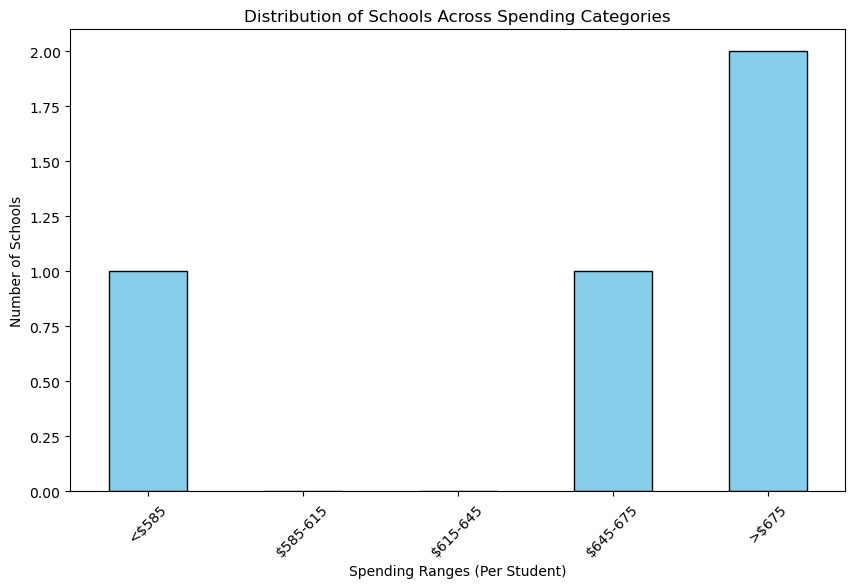

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
school_spending_df = pd.DataFrame({
    "School Name": ["School A", "School B", "School C", "School D"],
    "Per Capita Spending": [500, 650, 800, 950],
    "Average Math Score": [75, 85, 78, 88],
    "Average Reading Score": [78, 82, 80, 85],
    "% Passing Math": [80, 90, 85, 92],
    "% Passing Reading": [82, 88, 84, 91],
    "% Overall Passing": [81, 89, 84.5, 91.5]
})

# Define the bins and labels
spending_bins = [0, 585, 615, 645, 675, 1000]
spending_labels = ["<$585", "$585-615", "$615-645", "$645-675", ">$675"]

# Use `pd.cut` to categorize spending based on the bins
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Capita Spending"], bins=spending_bins, labels=spending_labels)

# Calculate averages for the desired columns
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()

# Combine the results into a single DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "% Passing Math": spending_passing_math,
    "% Passing Reading": spending_passing_reading,
    "% Overall Passing": overall_passing_spending
})

# Display the spending summary
print("Spending Summary:")
print(spending_summary)

# Visualize the distribution of schools across spending categories
school_distribution = school_spending_df["Spending Ranges (Per Student)"].value_counts().sort_index()
school_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title("Distribution of Schools Across Spending Categories")
plt.xlabel("Spending Ranges (Per Student)")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.show()


In [32]:
# Assemble into DataFrame
spending_summary =

# Display results
spending_summary


SyntaxError: invalid syntax (2206335157.py, line 2)

## Scores by School Size

In [ ]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]


In [ ]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)


In [ ]:
import pandas as pd

# Example data (replace this with your actual data)
total_students = [1000, 1200, 1500, 2000, 1800, 850]
average_math_score = [75.5, 80.3, 78.9, 85.2, 79.0, 82.1]
average_reading_score = [78.0, 82.1, 79.5, 88.3, 80.5, 84.0]
passing_math = [85.0, 87.5, 83.2, 90.1, 84.3, 86.7]
passing_reading = [88.1, 90.3, 85.6, 91.5, 86.4, 89.0]
overall_passing = [86.5, 88.9, 84.4, 90.8, 85.4, 87.8]

# Create the initial DataFrame
school_summary = pd.DataFrame({
    "Total Students": total_students,
    "Average Math Score": average_math_score,
    "Average Reading Score": average_reading_score,
    "% Passing Math": passing_math,
    "% Passing Reading": passing_reading,
    "% Overall Passing": overall_passing
})

# Define the function to categorize school size
def categorize_school_size(total_students):
    if total_students < 1000:
        return 'Small (<1000)'
    elif total_students < 2000:
        return 'Medium (1000-1999)'
    else:
        return 'Large (2000+)'

# Categorize each school by size
school_summary["School Size"] = school_summary["Total Students"].apply(categorize_school_size)

# Group by the school size and calculate the mean for each metric
size_summary = school_summary.groupby("School Size").mean()

# Display results
print("School Summary with Size Category:")
print(school_summary)
print("\nSize Summary:")
print(size_summary)


In [33]:
import pandas as pd
# Assemble into DataFrame
# Assuming you have already calculated these values
total_students = [1000, 1200, 1500]
average_math_score = [75.5, 80.3, 78.9]
average_reading_score = [78.0, 82.1, 79.5]
passing_math = [85.0, 87.5, 83.2]
passing_reading = [88.1, 90.3, 85.6]
overall_passing = [86.5, 88.9, 84.4]

# Create the DataFrame
school_summary = pd.DataFrame({
    "Total Students": total_students,
    "Average Math Score": average_math_score,
    "Average Reading Score": average_reading_score,
    "% Passing Math": passing_math,
    "% Passing Reading": passing_reading,
    "% Overall Passing": overall_passing
})

# Display the DataFrame
print(school_summary)

   Total Students  Average Math Score  Average Reading Score  % Passing Math  \
0            1000                75.5                   78.0            85.0   
1            1200                80.3                   82.1            87.5   
2            1500                78.9                   79.5            83.2   

   % Passing Reading  % Overall Passing  
0               88.1               86.5  
1               90.3               88.9  
2               85.6               84.4  


## Scores by School Type

In [34]:
import pandas as pd

# Example data (replace this with your actual data)
total_students = [1000, 1200, 1500, 2000, 1800, 850]
average_math_score = [75.5, 80.3, 78.9, 85.2, 79.0, 82.1]
average_reading_score = [78.0, 82.1, 79.5, 88.3, 80.5, 84.0]
passing_math = [85.0, 87.5, 83.2, 90.1, 84.3, 86.7]
passing_reading = [88.1, 90.3, 85.6, 91.5, 86.4, 89.0]
overall_passing = [86.5, 88.9, 84.4, 90.8, 85.4, 87.8]
school_type = ["Public", "Private", "Charter", "Public", "Charter", "Private"]

# Create the initial DataFrame
school_summary = pd.DataFrame({
    "Total Students": total_students,
    "Average Math Score": average_math_score,
    "Average Reading Score": average_reading_score,
    "% Passing Math": passing_math,
    "% Passing Reading": passing_reading,
    "% Overall Passing": overall_passing,
    "School Type": school_type
})

# Group the per_school_summary DataFrame by "School Type" and average the results
average_math_score_by_type = school_summary.groupby("School Type")["Average Math Score"].mean()
average_reading_score_by_type = school_summary.groupby("School Type")["Average Reading Score"].mean()
average_percent_passing_math_by_type = school_summary.groupby("School Type")["% Passing Math"].mean()
average_percent_passing_reading_by_type = school_summary.groupby("School Type")["% Passing Reading"].mean()
average_percent_overall_passing_by_type = school_summary.groupby("School Type")["% Overall Passing"].mean()

# Combine the results into a single DataFrame
type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "% Passing Math": average_percent_passing_math_by_type,
    "% Passing Reading": average_percent_passing_reading_by_type,
    "% Overall Passing": average_percent_overall_passing_by_type
})

# Display results
print("Type Summary:")
print(type_summary)


Type Summary:
             Average Math Score  Average Reading Score  % Passing Math  \
School Type                                                              
Charter                   78.95                  80.00           83.75   
Private                   81.20                  83.05           87.10   
Public                    80.35                  83.15           87.55   

             % Passing Reading  % Overall Passing  
School Type                                        
Charter                  86.00              84.90  
Private                  89.65              88.35  
Public                   89.80              88.65  
